# Notebook 4 Exercises 

by [Sergio Castelblanco](http://www.linkedin.com/in/sergio-castelblanco/) -- [Jhon Gonzalez](http://linkedin.com/in/jhon-franklin-gonzalez-gamboa-b6123230/)


version 2.0, June 20 2018

# Exercise 04

# Fraud Detection

## Introduction

- Fraud Detection Dataset from Microsoft Azure: [data](http://gallery.cortanaintelligence.com/Experiment/8e9fe4e03b8b4c65b9ca947c72b8e463)

Fraud detection is one of the earliest industrial applications of data mining and machine learning. Fraud detection is typically handled as a binary classification problem, but the class population is unbalanced because instances of fraud are usually very rare compared to the overall volume of transactions. Moreover, when fraudulent transactions are discovered, the business typically takes measures to block the accounts from transacting to prevent further losses. 

In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
# Import the neccesary libraries and set a seed. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import itertools
warnings.filterwarnings("ignore")
%matplotlib inline
from PIL import Image

In [7]:
import zipfile
with zipfile.ZipFile('../datasets/fraud_detection.csv.zip', 'r') as z:
    f = z.open('15_fraud_detection.csv')
    data = pd.io.parsers.read_table(f, index_col=0, sep=',')

FileNotFoundError: [Errno 2] No such file or directory: '../datasets/fraud_detection.csv.zip'

In [48]:
data.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402,0
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349,0
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303,0
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402,0
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771,0


In [10]:
data.shape, data.Label.sum(), data.Label.mean()

((138721, 16), 797, 0.0057453449730033666)

In [11]:
X = data.drop(['Label'], axis=1)
y = data['Label']

the next step is determine the proportion of target variable in dataset

Text(0.5,1,'Proportion of target variable in dataset')

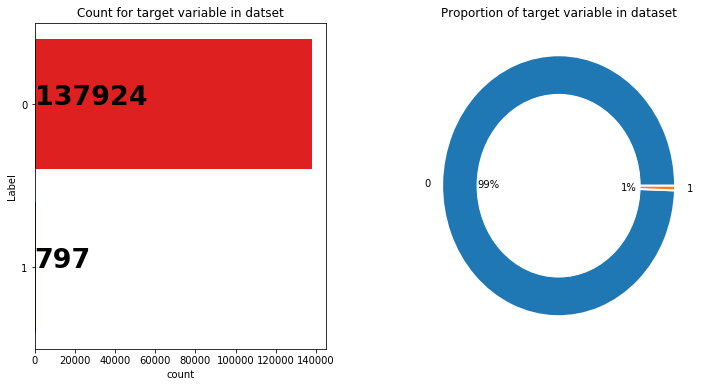

In [14]:
plt.figure(figsize=(12,6))
plt.subplot(121)
ax = sns.countplot(y = data["Label"],palette=["r","g"])
for i,j in enumerate(data["Label"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize = 27)
plt.title("Count for target variable in datset")


plt.subplot(122)
plt.pie(data["Label"].value_counts().values,labels=["0","1"],autopct="%1.0f%%",wedgeprops={"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)
plt.subplots_adjust(wspace = .3)
plt.title("Proportion of target variable in dataset")

we can see in the last plot the unbalanced dataset in the binary variable (1) fraud detection, for this reason is very important implement balanced methods to improve the target variable, and create better predictive models without bias.

# Exercice 04.1

Estimate a Logistic Regression

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

The first Step is Split the original data into train and test, to measure the performance model with new data and to know its predictive capacity and generalizing, in this case we split 70% Train and 30% test.

In [67]:
from sklearn import model_selection 

dataSize = data.shape[0]
print("El archivo contiene: ",dataSize)

percentage = 0.30 

xTrain,xTest,yTrain,yTest = model_selection.train_test_split(data.iloc[:,0:15],data.iloc[:,15:],test_size=percentage,random_state=22)

El archivo contiene:  138721


In [56]:
data.iloc[:,15:].columns


Index(['Label'], dtype='object')

Text(0,0.5,'')

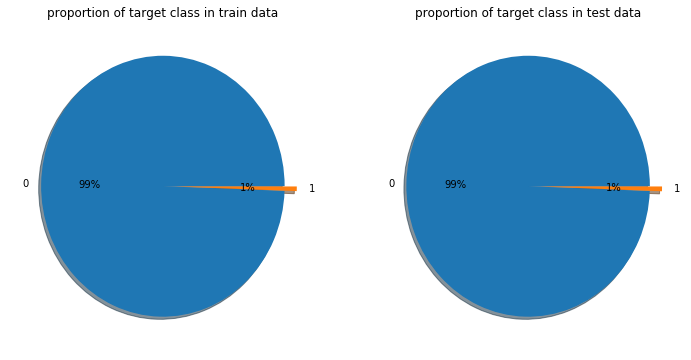

In [57]:
from sklearn.model_selection import train_test_split

#train , test = train_test_split(data,test_size = .3,random_state = 123)

plt.figure(figsize=(12,6))
plt.subplot(121)
yTrain["Label"].value_counts().plot.pie(labels = ["0","1"],autopct = "%1.0f%%",shadow = True,explode=[0,.1])
plt.title("proportion of target class in train data")
plt.ylabel("")
plt.subplot(122)
yTest["Label"].value_counts().plot.pie(labels = ["0","1"],autopct = "%1.0f%%",shadow = True,explode=[0,.1])
plt.title("proportion of target class in test data")
plt.ylabel("")

Before, of run the logistic regression model is very important to know which the most significant variables in the data set that allow the better performance of the model, for this purpose, we implement the stepwise selection function, it use forward and backwrd method.

In [61]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import statsmodels.api as sm

X = xTrain
y = yTrain


def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

Add  localHour - LogOddsForClass_0  with p-value 9.86905e-38
Add  accountAge                     with p-value 3.80211e-26
Add  paymentBillingState - LogOddsForClass_0 with p-value 2.84829e-14
Add  digitalItemCount               with p-value 1.25417e-05
Add  transactionAmountUSD           with p-value 2.40672e-05
Add  accountState - LogOddsForClass_0 with p-value 0.00437381
Add  paymentBillingPostalCode - LogOddsForClass_0 with p-value 0.00171109
resulting features:
['localHour - LogOddsForClass_0', 'accountAge', 'paymentBillingState - LogOddsForClass_0', 'digitalItemCount', 'transactionAmountUSD', 'accountState - LogOddsForClass_0', 'paymentBillingPostalCode - LogOddsForClass_0']


the final result to apply the stepwise function is that 7 variables are significants with p.value less than 0.05

Later, we can implement a model function that allow us run different predictive models, this function to run algorithms and extract the AUC score, accuracy, confusion matrix, F1-score and ROC curve. 

In [221]:
# MODEL FUNCTION

# Import libraries.
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import cross_val_score
# Function definition. 
def model(algorithm,dtrain_x,dtrain_y,dtest_x,dtest_y,of_type):
    
    
    print ("*****************************************************************************************")
    print ("                           MODEL - OUTPUT")
    print ("*****************************************************************************************")
    algorithm.fit(dtrain_x,dtrain_y)
    predictions = algorithm.predict(dtest_x)
    
    print (algorithm)
    print ("\n Accuracy Score :",accuracy_score(dtest_y,predictions))
    
    print ("\n Classification Report : \n \n",(classification_report(dtest_y,predictions)))
        
    plt.figure(figsize=(14,10))
    plt.subplot(221)
    sns.heatmap(confusion_matrix(dtest_y,predictions),annot=True,fmt = "d",linecolor="k",linewidths=3)
    plt.title("Confusion Matrix",fontsize=18,fontweight="bold")
    
    predicting_probabilites = algorithm.predict_proba(dtest_x)[:,1]
    fpr,tpr,thresholds = roc_curve(dtest_y,predicting_probabilites)
    plt.subplot(222)
    plt.plot(fpr,tpr,label = ("Area_under the curve :",round(auc(fpr,tpr),3)),color = "r")
    plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
    plt.legend(loc = "best")
    plt.title("ROC - Curve & Area Under Curve",fontsize=18,fontweight="bold")
    
    if  of_type == "feat":
        
        dataframe = pd.DataFrame(algorithm.feature_importances_,dtrain_x.columns).reset_index()
        dataframe = dataframe.rename(columns={"index":"features",0:"coefficients"})
        dataframe = dataframe.sort_values(by="coefficients",ascending = False)
        plt.subplot(223)
        
        ax = sns.barplot(x = "coefficients" ,y ="features",data=dataframe,palette="husl")
        plt.title("Feature Importance",fontsize=18,fontweight="bold")
        for i,j in enumerate(dataframe["coefficients"]):
            ax.text(.002,i+0.45,round(j,3),weight = "bold")
    
    elif of_type == "coef" :
        
        dataframe = pd.DataFrame(algorithm.coef_.ravel(),dtrain_x.columns).reset_index()
        dataframe = dataframe.rename(columns={"index":"features",0:"coefficients"})
        dataframe = dataframe.sort_values(by="coefficients",ascending = False)
        plt.subplot(223)
        ax = sns.barplot(x = "coefficients" ,y ="features",data=dataframe,palette="husl")
        plt.title("Feature Importance",fontsize=18,fontweight="bold")
        for i,j in enumerate(dataframe["coefficients"]):
            ax.text(max(dataframe["coefficients"])/20,i+0.45,round(j,3),weight = "bold")
            
    elif of_type == "none" :
        plt.subplot(223)
    
    # Cross Validation Analysis. 
    
    k=10  # Scoring with Accuracy.
    scoresAccuracy=cross_val_score(rfc,data.drop(['Label'], axis=1),data['Label'],cv=k)
    #print("Accuracy: %0.3f (+/- %0.3f)" % (scoresAccuracy.mean(), scoresAccuracy.std() * 2))
    
    k=10  # Scoring with AUC.
    scoresAUC=cross_val_score(rfc,data.drop(['Label'], axis=1),data['Label'],cv=k,scoring='roc_auc')
    #print("Accuracy: %0.3f (+/- %0.3f)" % (scoresAUC.mean(), scoresAUC.std() * 2))
    
    plt.subplot(224)
    plt.title("Cross Validation Results",fontsize=18,fontweight="bold")
    lastPlot = plt.subplot(224)

    circle1 = plt.Circle((2, 2), 1, color='grey', alpha =0.7)
    circle2 = plt.Circle((5, 2), 1, color='#000033' , alpha=0.3)
    
    lastPlot.set_xlim((0,7))
    lastPlot.set_ylim((0,4))
    
    lastPlot.add_artist(circle1)
    lastPlot.add_artist(circle2)
    
    lastPlot.text(2,2.25,"AUC",weight = "bold",fontsize=16,ha='center')
    lastPlot.text(5,2.25,"Accuracy",weight = "bold",fontsize=16,ha='center')
    
    lastPlot.text(2,1.65,"%0.3f \n (+/- %0.3f)" % (scoresAUC.mean(), scoresAUC.std() * 2),fontsize=14 ,ha='center')
    lastPlot.text(5,1.65,"%0.3f \n (+/- %0.3f)" % (scoresAccuracy.mean(), scoresAccuracy.std() * 2),fontsize=14,ha='center')
    
    lastPlot.axis('off')
    
    lastPlot.plot()
    



In [218]:
data['Label']

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        1
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
138691    0
138692    0
138693    0
138694    0
138695    0
138696    0
138697    0
138698    0
138699    0
138700    0
138701    0
138702    0
138703    0
138704    0
138705    0
138706    0
138707    0
138708    0
138709    0
138710    0
138711    0
138712    0
138713    0
138714    0
138715    0
138716    0
138717    0
138718    0
138719    0
138720    0
Name: Label, Length: 138721, dtype: int64

## Logistic Regression

*****************************************************************************************
                           MODEL - OUTPUT
*****************************************************************************************
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

 Accuracy Score : 0.994112982675

 Classification Report : 
 
              precision    recall  f1-score   support

          0       0.99      1.00      1.00     41372
          1       0.00      0.00      0.00       245

avg / total       0.99      0.99      0.99     41617



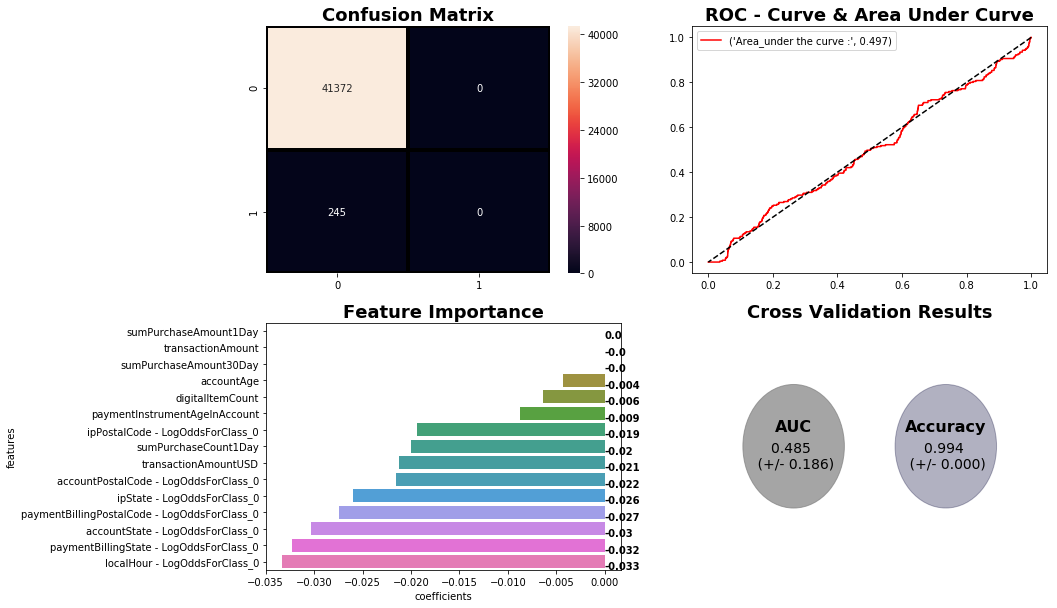

In [69]:
from sklearn.linear_model import LogisticRegression

rfc = LogisticRegression()

# Call model function to train algorithm.

model(rfc,xTrain,yTrain,xTest,yTest,"coef")

we can see in the last report about the logistic regression model that all predictions is in the unbalanced class (0) not fraud, therefore is necessary apply Resampling techniques  in the target class.

# Exercice 04.2

Under-sample the negative class using random-under-sampling

Which is parameter for target_percentage did you choose?
How the results change?

**Only apply under-sampling to the training set, evaluate using the whole test set**

In [219]:
X = data.drop(['Label'], axis=1)
y = data['Label']
x_train, x_test, y_train, y_test =train_test_split(X,y,random_state=2)

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        1
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
138691    0
138692    0
138693    0
138694    0
138695    0
138696    0
138697    0
138698    0
138699    0
138700    0
138701    0
138702    0
138703    0
138704    0
138705    0
138706    0
138707    0
138708    0
138709    0
138710    0
138711    0
138712    0
138713    0
138714    0
138715    0
138716    0
138717    0
138718    0
138719    0
138720    0
Name: Label, Length: 138721, dtype: int64

In [97]:
def UnderSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_0_new =  n_samples_1 / target_percentage - n_samples_1
    n_samples_0_new_per = n_samples_0_new / n_samples_0

    filter_ = y == 0

    np.random.seed(seed)
    rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)
    
    filter_ = filter_ & rand_1
    filter_ = filter_ | (y == 1)
    filter_ = filter_.astype(bool)
    
    return X[filter_], y[filter_]

In [98]:
Fraude = (y_train == 1).sum()
No_Fraude = (y_train == 0).sum()
float(Fraude)/(float(Fraude)+float(No_Fraude))

0.005622837370242215

In [207]:
#Balanced 30% 

Xb, yb = UnderSampling(x_train, y_train, target_percentage= 0.3)

Fraude = (yb == 1).sum()
No_Fraude = (yb == 0).sum()
float(Fraude)/(float(Fraude)+float(No_Fraude))

0.30077120822622105

In [204]:
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    X_u, y_u = UnderSampling(x_train, y_train, target_percentage, 1)
    print('Target percentage', target_percentage)
    print('y.shape = ',y_u.shape[0], 'y.mean() = ', y_u.mean())
    #plot_two_classes(X_u, y_u, size=(5, 5))
    #plt.show() 

Target percentage 0.1
y.shape =  5823 y.mean() =  0.10046367851622875
Target percentage 0.2
y.shape =  2926 y.mean() =  0.19993164730006835
Target percentage 0.3
y.shape =  1907 y.mean() =  0.3067645516518091
Target percentage 0.4
y.shape =  1420 y.mean() =  0.4119718309859155
Target percentage 0.5
y.shape =  1143 y.mean() =  0.5118110236220472


In [205]:
yb=pd.DataFrame(yb,columns=['Label'],dtype=int)
#yb.to_csv("Label", index=False)
yb

,Label
59081,0
115703,0
8571,0
60656,0
17070,0
14542,0
94225,0
13049,0
18025,1
55248,0


Text(0.5,1,'Proportion of target variable in datase with UnderSampling')

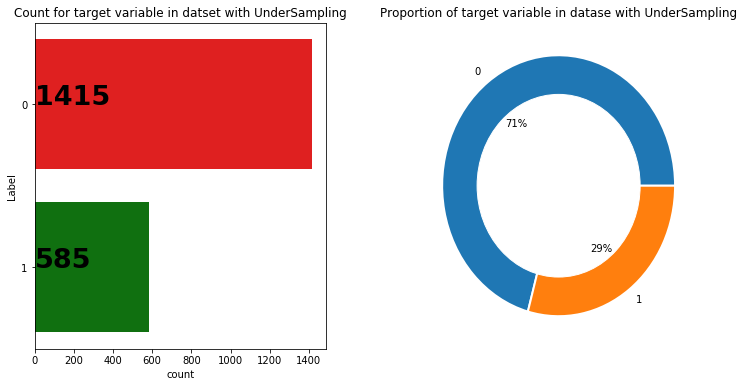

In [206]:
plt.figure(figsize=(12,6))
plt.subplot(121)
ax = sns.countplot(y = yb["Label"],palette=["r","g"])
for i,j in enumerate(yb["Label"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize = 27)
plt.title("Count for target variable in datset with UnderSampling")


plt.subplot(122)
plt.pie(yb["Label"].value_counts().values,labels=["0","1"],autopct="%1.0f%%",wedgeprops={"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)
plt.subplots_adjust(wspace = .3)
plt.title("Proportion of target variable in datase with UnderSampling")

*****************************************************************************************
                           MODEL - OUTPUT
*****************************************************************************************
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

 Accuracy Score : 0.967945791383

 Classification Report : 
 
              precision    recall  f1-score   support

          0       0.99      0.97      0.98     41372
          1       0.03      0.13      0.05       245

avg / total       0.99      0.97      0.98     41617



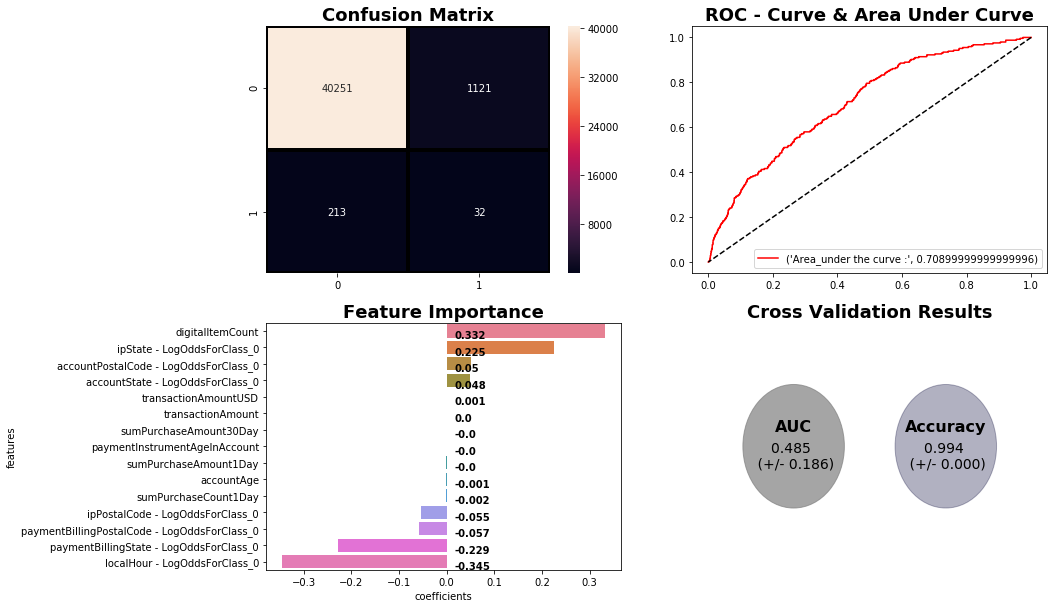

In [150]:
rfc = LogisticRegression()

# Call model function to train algorithm.

model(rfc,Xb,yb,xTest,yTest,"coef")

# Exercice 04.3

Now using random-over-sampling

In [111]:
import random
def OverSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_1_new =  -target_percentage * n_samples_0 / (target_percentage- 1)

    np.random.seed(seed)
    filter_ = np.random.choice(X[y == 1].shape[0], int(n_samples_1_new))
    # filter_ is within the positives, change to be of all
    filter_ = np.nonzero(y == 1)[0][filter_]
    
    filter_ = np.concatenate((filter_, np.nonzero(y == 0)[0]), axis=0)
    
    return X.iloc[filter_], y.iloc[filter_]

In [153]:
# Balanced 30%

X_b2, y_b2 = OverSampling(x_train, y_train, target_percentage = 0.3)

Fraude = (y_b2 == 1).sum()
No_Fraude = (y_b2 == 0).sum()
float(Fraude)/(float(Fraude)+float(No_Fraude))

0.29999594024033777

In [154]:
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    X_u, y_u = OverSampling(x_train, y_train, target_percentage, 1)
    print('Target percentage', target_percentage)
    print('y.shape = ',y_u.shape[0], 'y.mean() = ', y_u.mean())
    #plot_two_classes(X_u, y_u, size=(5, 5))
    #plt.show() 

Target percentage 0.1
y.shape =  114950 y.mean() =  0.1
Target percentage 0.2
y.shape =  129318 y.mean() =  0.19999536027467174
Target percentage 0.3
y.shape =  147792 y.mean() =  0.29999594024033777
Target percentage 0.4
y.shape =  172425 y.mean() =  0.4
Target percentage 0.5
y.shape =  206910 y.mean() =  0.5


In [155]:
y_b2=pd.DataFrame(y_b2,columns=['Label'],dtype=int)
#yb.to_csv("Label", index=False)
y_b2

,Label
20423,1
62721,1
136695,1
83926,1
83879,1
20335,1
107965,1
131842,1
89963,1
36564,1


Text(0.5,1,'Proportion of target variable in dataset with OverSampling')

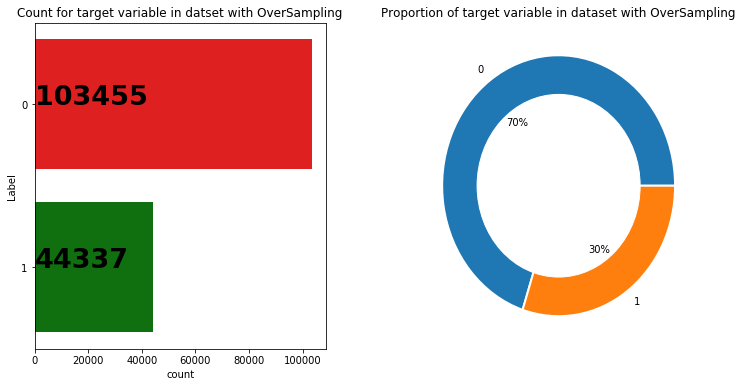

In [223]:
plt.figure(figsize=(12,6))
plt.subplot(121)
ax = sns.countplot(y = y_b2["Label"],palette=["r","g"])
for i,j in enumerate(y_b2["Label"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize = 27)
plt.title("Count for target variable in datset with OverSampling")


plt.subplot(122)
plt.pie(y_b2["Label"].value_counts().values,labels=["0","1"],autopct="%1.0f%%",wedgeprops={"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)
plt.subplots_adjust(wspace = .3)
plt.title("Proportion of target variable in dataset with OverSampling")

*****************************************************************************************
                           MODEL - OUTPUT
*****************************************************************************************
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

 Accuracy Score : 0.963332292092

 Classification Report : 
 
              precision    recall  f1-score   support

          0       0.99      0.97      0.98     41372
          1       0.03      0.16      0.05       245

avg / total       0.99      0.96      0.98     41617



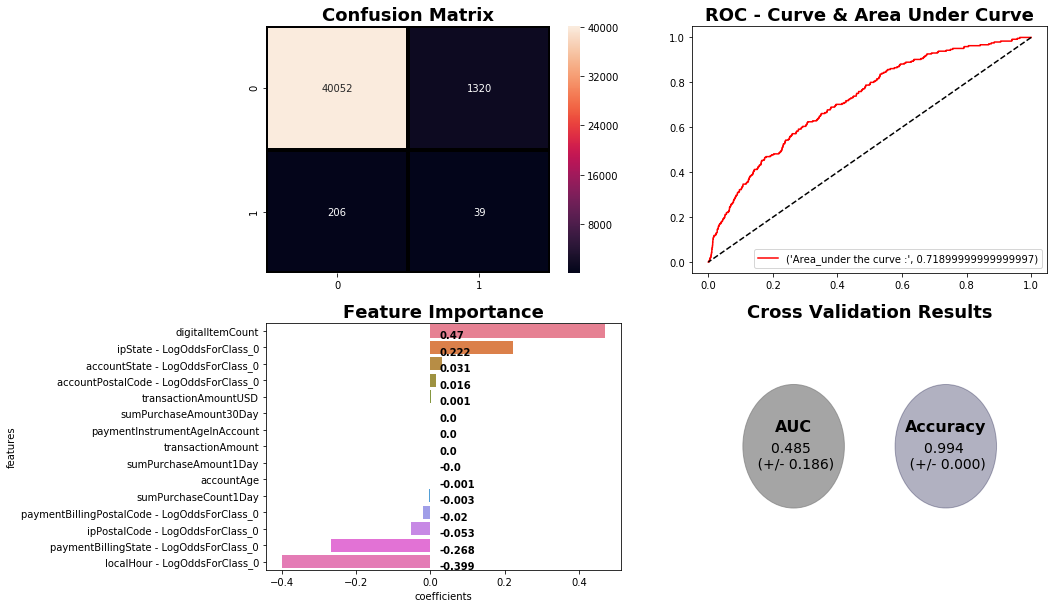

In [157]:
rfc = LogisticRegression()

# Call model function to train algorithm.

model(rfc,X_b2, y_b2,xTest,yTest,"coef")

# Exercice 04.4*
Evaluate the results using SMOTE

Which parameters did you choose?

In [168]:
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

In [172]:
def SMOTE_MANUAL(X, y, target_percentage=0.5, k=5, seed=None):
    
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()
    
    #New samples
    n_samples_1_new =  int(-target_percentage * n_samples_0 / (target_percentage- 1) - n_samples_1)
    
    # A matrix to store the synthetic samples
    new = np.zeros((n_samples_1_new, X.shape[1]))
    
    # Create seeds
    np.random.seed(seed)
    seeds = np.random.randint(1, 1000000, 3)
    
    # Select examples to use as base
    np.random.seed(seeds[0])
    sel_ = np.random.choice(y[y==1].shape[0], n_samples_1_new)
    
    # Define random seeds (2 per example)
    np.random.seed(seeds[1])
    nn__ = np.random.choice(k, n_samples_1_new)
    np.random.seed(seeds[2])
    steps = np.random.uniform(size=n_samples_1_new)  

    # For each selected examples create one synthetic case
    for i, sel in enumerate(sel_):
        # Select neighbor
        nn_ = nn__[i]
        step = steps[i]
        # Create new sample
        new[i, :] = X[y==1].iloc[sel] - step * (X[y==1].iloc[sel] - X[y==1].iloc[nn_])
    
    X = np.vstack((X, new))
    y = np.append(y, np.ones(n_samples_1_new))
    
    return X, y

In [174]:
#Fraude del 25% en rebalanceo

X_b3, y_b3 = SMOTE_MANUAL(x_train, y_train, target_percentage=0.25, k=5)
Fraude = (y_b3 == 1).sum()
No_Fraude = (y_b3 == 0).sum()
float(Fraude)/(float(Fraude)+float(No_Fraude))

0.25

In [176]:
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    X_u, y_u = SMOTE_MANUAL(x_train, y_train, target_percentage, 1)
    print('Target percentage', target_percentage)
    print('y.shape = ',y_u.shape[0], 'y.mean() = ', y_u.mean())
    #plot_two_classes(X_u, y_u, size=(5, 5))
    #plt.show() 

Target percentage 0.1
y.shape =  114950 y.mean() =  0.1
Target percentage 0.2
y.shape =  129318 y.mean() =  0.199995360275
Target percentage 0.3
y.shape =  147792 y.mean() =  0.29999594024
Target percentage 0.4
y.shape =  172425 y.mean() =  0.4
Target percentage 0.5
y.shape =  206910 y.mean() =  0.5


In [177]:
y_b3=pd.DataFrame(y_b3,columns=['Label'],dtype=int)
#yb.to_csv("Label", index=False)
y_b3

,Label
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


Text(0.5,1,'Proportion of target variable in dataset with SMOTE')

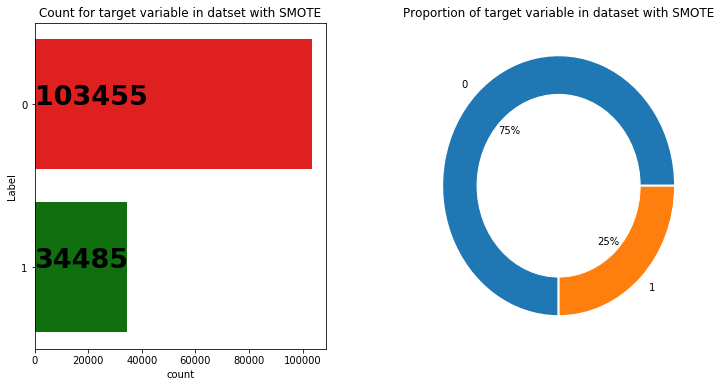

In [178]:
plt.figure(figsize=(12,6))
plt.subplot(121)
ax = sns.countplot(y = y_b3["Label"],palette=["r","g"])
for i,j in enumerate(y_b3["Label"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize = 27)
plt.title("Count for target variable in datset with SMOTE")


plt.subplot(122)
plt.pie(y_b3["Label"].value_counts().values,labels=["0","1"],autopct="%1.0f%%",wedgeprops={"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)
plt.subplots_adjust(wspace = .3)
plt.title("Proportion of target variable in dataset with SMOTE")

*****************************************************************************************
                           MODEL - OUTPUT
*****************************************************************************************
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

 Accuracy Score : 0.948122161617

 Classification Report : 
 
              precision    recall  f1-score   support

          0       0.99      0.95      0.97     41372
          1       0.02      0.19      0.04       245

avg / total       0.99      0.95      0.97     41617



AttributeError: 'numpy.ndarray' object has no attribute 'columns'

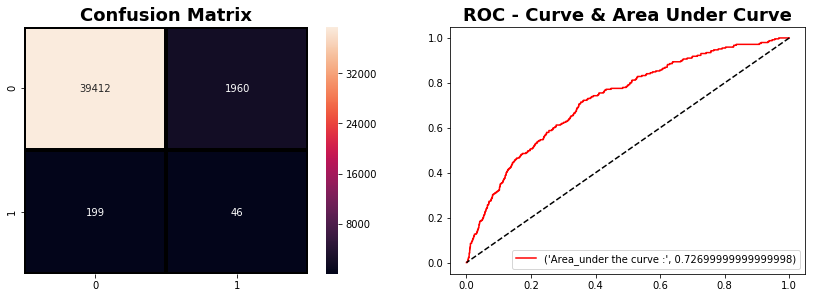

In [188]:
rfc = LogisticRegression()

# Call model function to train algorithm.

model(rfc,X_b3,y_b3,xTest,yTest,"coef")

# Exercice 04.5

Estimate a Logistic Regression, GaussianNB, K-nearest neighbors and a Decision Tree **Classifiers**

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

Combine the classifiers and comment

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [4]:
models = {'LOG': LogisticRegression(),
          'DTC': DecisionTreeClassifier(),
          'GNB': GaussianNB(),
          'KNN': KNeighborsClassifier()}

In [5]:
for model in models.keys():
    models[model].fit(x_train, y_train)

NameError: name 'x_train' is not defined

In [184]:
# predict test for each model
y_pred5 = pd.DataFrame(index=x_test.index, columns=models.keys())
for model in models.keys():
    y_pred5[model] = models[model].predict(x_test)

In [1]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,roc_auc_score
#Metricas

for model in models.keys():
    print(model,'accuracy',accuracy_score(y_test,y_pred5[model]))
    print(model,'precision',precision_score(y_test,y_pred5[model]))
    print(model,'recall',recall_score(y_test,y_pred5[model]))
    print(model,'f1 score', f1_score(y_test,y_pred5[model]))

NameError: name 'models' is not defined

In [ ]:
# calculate RMSE
np.sqrt(mean_roc(y_test, y_pred))

# Exercice 04.6

Using the under-sampled dataset

Evaluate a RandomForestClassifier and compare the results

change n_estimators=100, what happened

*****************************************************************************************
                           MODEL - OUTPUT
*****************************************************************************************
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

 Accuracy Score : 0.916981041401

 Classification Report : 
 
              precision    recall  f1-score   support

          0       1.00      0.92      0.96     41372
          1       0.05      0.80      0.10       245

avg / total       0.99      0.92      0.95     41617



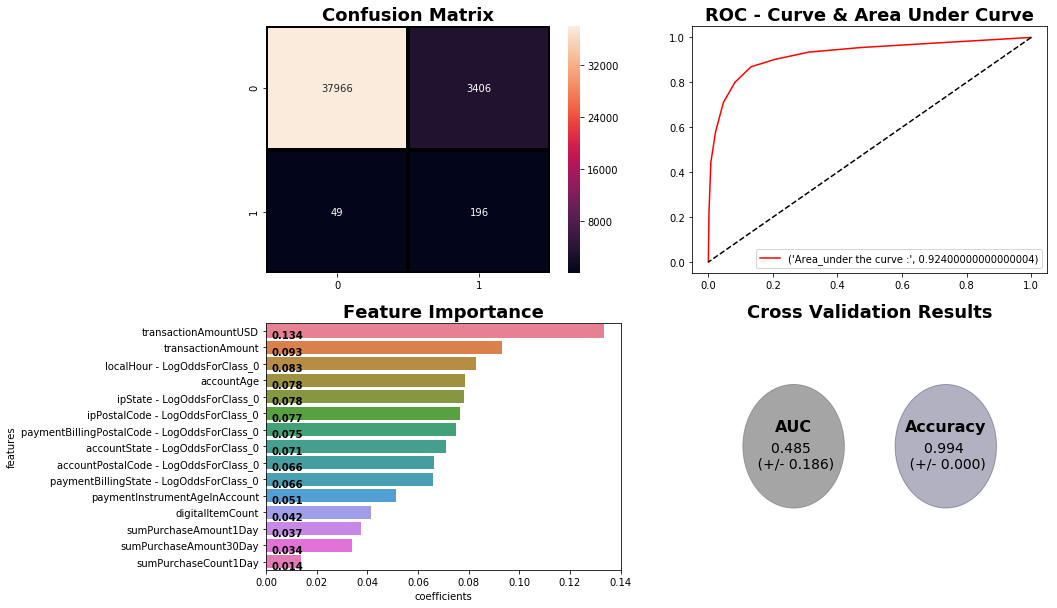

In [222]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier(class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)
model(rf,Xb,yb,xTest,yTest,"feat")

*****************************************************************************************
                           MODEL - OUTPUT
*****************************************************************************************
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

 Accuracy Score : 0.918470817214

 Classification Report : 
 
              precision    recall  f1-score   support

          0       1.00      0.92      0.96     41372
          1       0.06      0.88      0.11       245

avg / total       0.99      0.92      0.95     41617



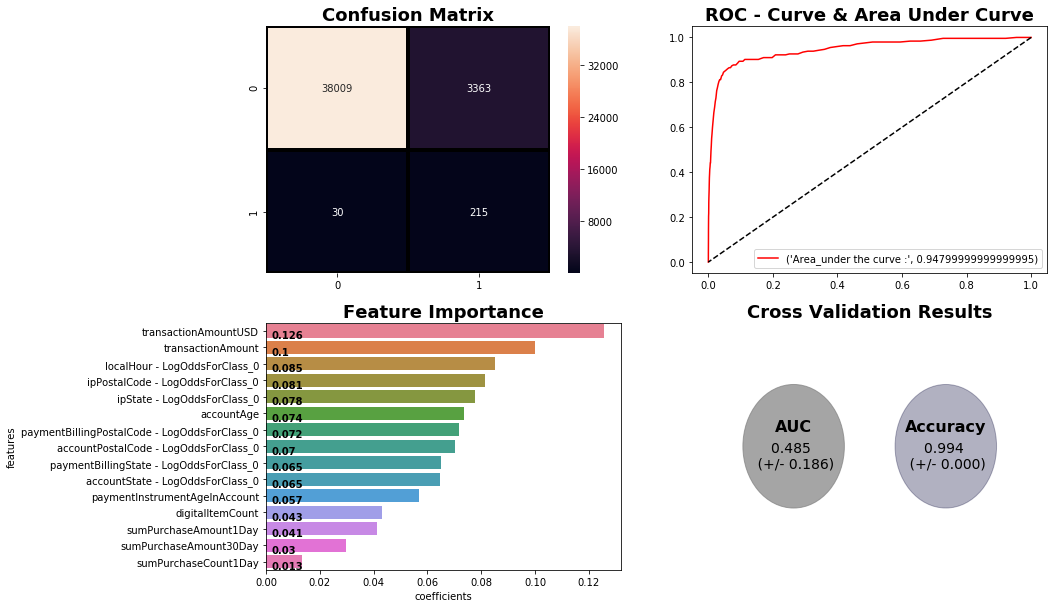

In [212]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier(class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)
model(rf,Xb,yb,xTest,yTest,"feat")